In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from datetime import datetime
import calendar
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')


In [20]:
train_df.head()





,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [21]:
test_df.head()


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [22]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [23]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [25]:
 train_df.describe()

    

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [26]:
test_df.describe()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


In [28]:
outliers=np.abs(train_df['count']-train_df['count'].mean()) > (3*train_df['count'].std())
outliers_num = len(train_df[outliers])
train_df.drop(index=train_df[outliers].index)
print("there are ",outliers_num,"Outliers")

there are  147 Outliers


In [30]:
def time_process(df):
    df['year'] = pd.DatetimeIndex(df['datetime']).year
    df['month'] = pd.DatetimeIndex(df['datetime']).month
    df['day'] = pd.DatetimeIndex(df['datetime']).day
    df['hour'] = pd.DatetimeIndex(df['datetime']).hour
    df['week'] = pd.DatetimeIndex(df['datetime']).weekofyear
    df['weekday'] = pd.DatetimeIndex(df['datetime']).dayofweek
    return df

train_df = time_process(train_df)
test_df = time_process(test_df)

In [32]:
train_df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,week,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,52,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,52,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,52,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,52,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,52,5


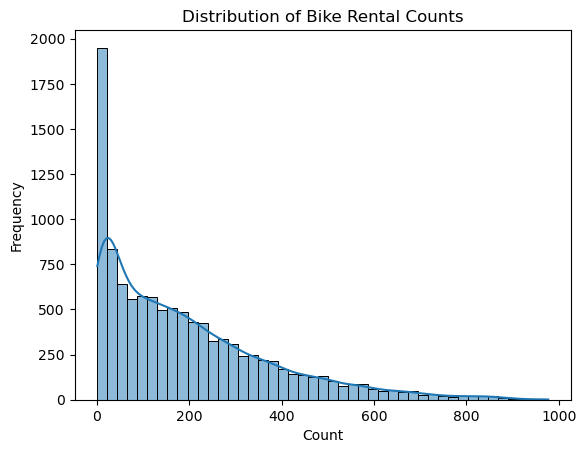

In [33]:
sns.histplot(train_df['count'], kde=True)
plt.title('Distribution of Bike Rental Counts')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.show()







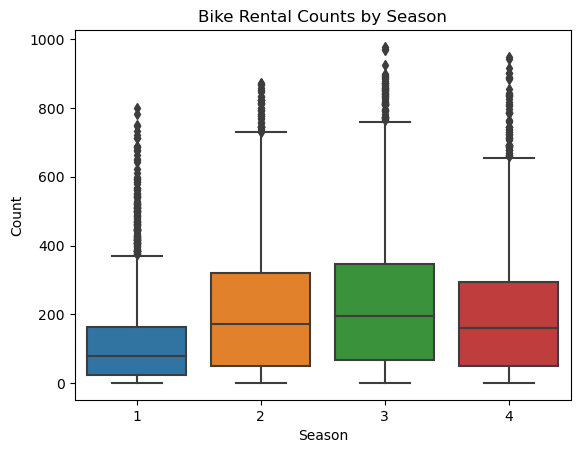

In [34]:
sns.boxplot(x='season', y='count', data=train_df)
plt.title('Bike Rental Counts by Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

In [56]:
def wind_fill(df):
    wind = df[df['windspeed']==1]
    wind_not0 = df[df['windspeed']!=1]
    y_label = wind_not0['windspeed']
    #Guessing wind speed is related to weather and time
    clf = RandomForestClassifier(n_estimators=1000,max_depth=10,random_state=0)
    windcolunms = ['season', 'weather', 'temp', 'atemp', 'humidity', 'hour', 'month']
    clf.fit(wind_not0[windcolunms], y_label.astype('int'))
    pred_y = clf.predict(wind[windcolunms])
    #Prediction result filling
    wind_0['windspeed'] = pred_y
    df_rfw = wind_not0.append(wind)
    df_rfw.reset_index(inplace=True)
    return df_rfw

train_df = wind_fill(train_df)
test_df= wind_fill(test_df)



ValueError: Found array with 0 sample(s) (shape=(0, 7)) while a minimum of 1 is required by RandomForestClassifier.

In [48]:
dt = pd.DatetimeIndex(train_df['datetime'])
train_df.set_index(dt, inplace=True)
dtt = pd.DatetimeIndex(test_df['datetime'])
test_df.set_index(dtt, inplace=True)
def get_day(day_start):
    day_end = day_start + pd.offsets.DateOffset(hours=23)
    return pd.date_range(day_start, day_end, freq="H")


train_df.loc[get_day(pd.datetime(2011, 4, 15)), "workingday"] = 1
train_df.loc[get_day(pd.datetime(2012, 4, 16)), "workingday"] = 1
test_df.loc[get_day(pd.datetime(2011, 11, 25)), "workingday"] = 0
test_df.loc[get_day(pd.datetime(2012, 11, 23)), "workingday"] = 0

test_df.loc[get_day(pd.datetime(2011, 12, 24)), "workingday"] = 0
test_df.loc[get_day(pd.datetime(2011, 12, 31)), "workingday"] = 0
test_df.loc[get_day(pd.datetime(2012, 12, 26)), "workingday"] = 0
test_df.loc[get_day(pd.datetime(2012, 12, 31)), "workingday"] = 0

train_df.loc[get_day(pd.datetime(2011, 4, 15)), "holiday"] = 0
train_df.loc[get_day(pd.datetime(2012, 4, 16)), "holiday"] = 0

test_df.loc[get_day(pd.datetime(2011, 11, 25)), "holiday"] = 1
test_df.loc[get_day(pd.datetime(2012, 11, 23)), "holiday"] = 1
test_df.loc[get_day(pd.datetime(2011, 12, 24)), "holiday"] = 1
test_df.loc[get_day(pd.datetime(2011, 12, 31)), "holiday"] = 1
test_df.loc[get_day(pd.datetime(2012, 12, 31)), "holiday"] = 1


test_df.loc[get_day(pd.datetime(2012, 5, 21)), "holiday"] = 1
train_df.loc[get_day(pd.datetime(2012, 6, 1)), "holiday"] = 1

In [50]:
def name_process(df):
     df['season2'] = df['season']
    df['weather2'] = df['weather']
    df['season2'] = df['season2'].map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})
    df['weather2'] = df['weather2'].map({1:'Clear',2:'Mist',3:'Light_Snow',4:'Heavy_Rain'})
    return df

train_df = name_process(train_df)
test_df = name_process(test_df)

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 3)

In [51]:
train_df['peak'] = train_df[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)
test_df['peak'] = test_df[['hour', 'workingday']].apply(lambda x: (0, 1)[(x['workingday'] == 1 and  ( x['hour'] == 8 or 17 <= x['hour'] <= 18 or 12 <= x['hour'] <= 12)) or (x['workingday'] == 0 and  10 <= x['hour'] <= 19)], axis = 1)

<Axes: xlabel='month', ylabel='count'>

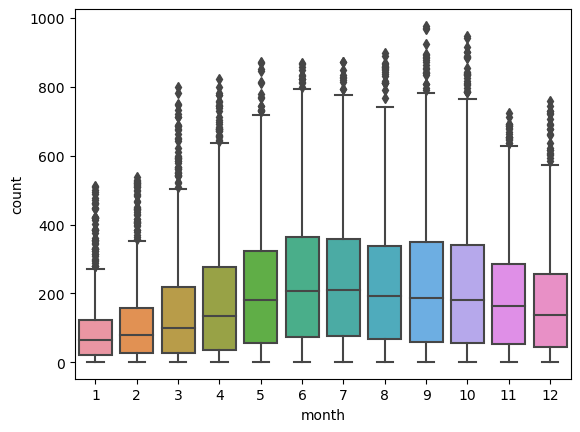

In [52]:
sns.boxplot(x='month',y='count',data=train_df)

<Axes: xlabel='workingday', ylabel='count'>

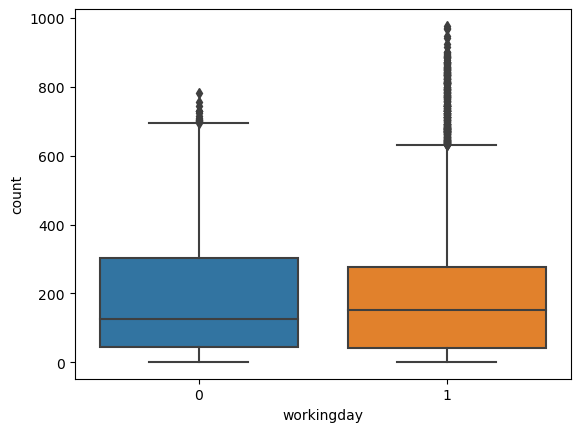

In [53]:
sns.boxplot(x='workingday',y='count',data=train_df)

<Axes: xlabel='hour', ylabel='count'>

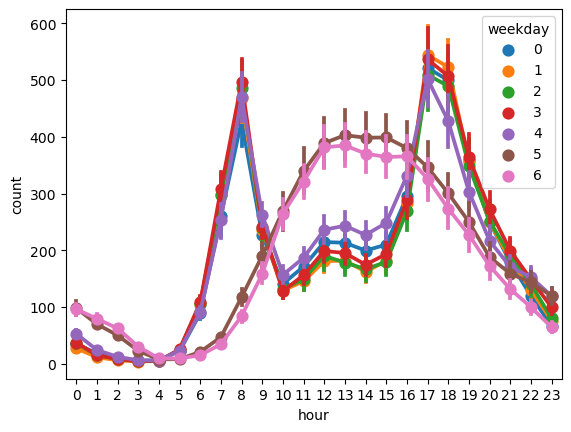

In [60]:
sns.pointplot(x='hour',y='count',hue='weekday',join=True,data=train_df)

<Axes: xlabel='hour', ylabel='registered'>

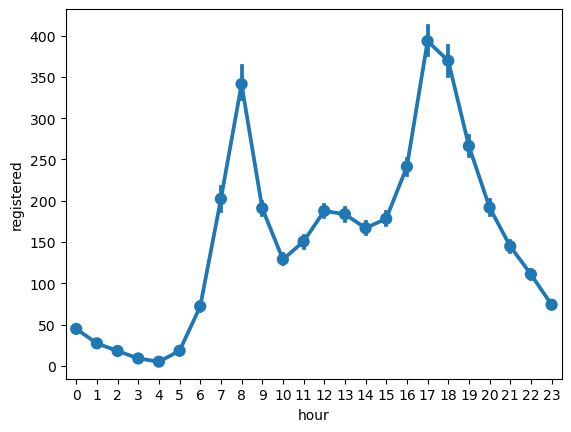

In [61]:
sns.pointplot(x='hour',y='registered',hue=None,join=True,data=train_df)

<Axes: xlabel='hour', ylabel='casual'>

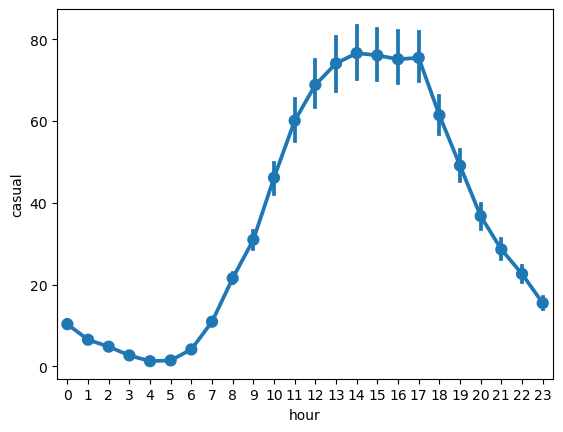

In [62]:
sns.pointplot(x='hour',y='casual',hue=None,join=True,data=train_df)

<Axes: xlabel='hour', ylabel='casual'>

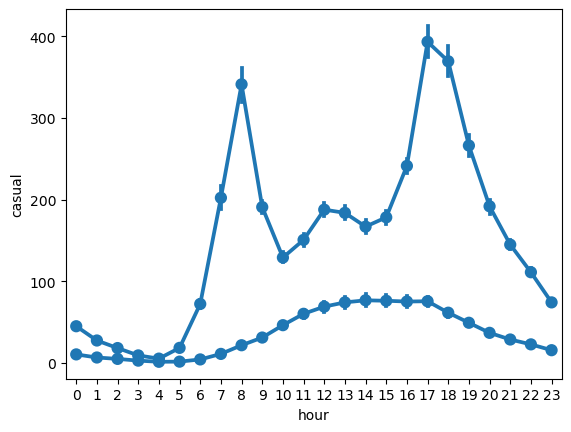

In [63]:
sns.pointplot(x='hour',y='registered',hue=None,join=True,data=train_df)
sns.pointplot(x='hour',y='casual',hue=None,join=True,data=train_df)

<Axes: xlabel='temp', ylabel='count'>

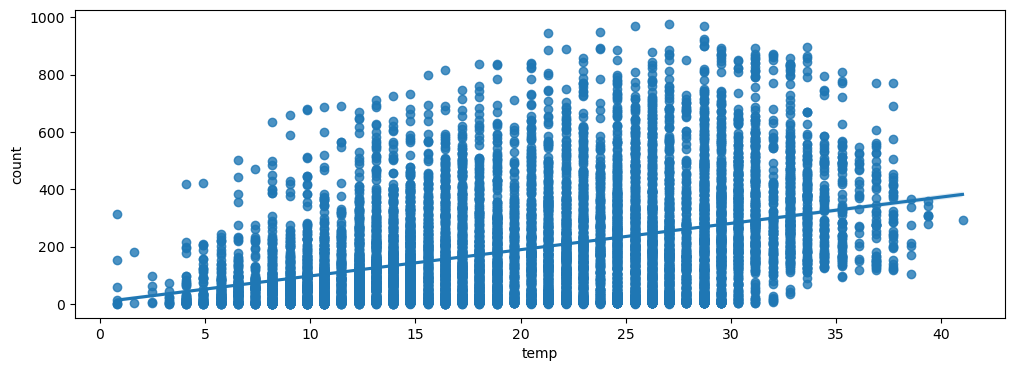

In [64]:
fig = plt.subplots(figsize=(12,4))
sns.regplot(x='temp',y='count',data=train_df)

<Axes: xlabel='atemp', ylabel='count'>

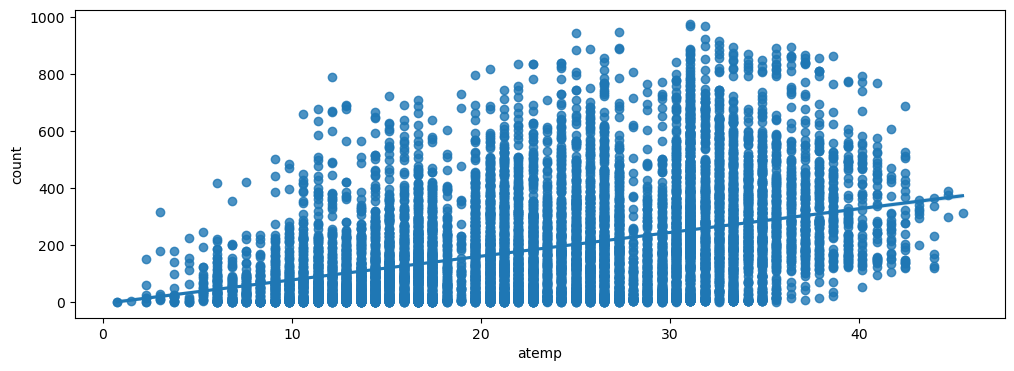

In [65]:
fig = plt.subplots(figsize=(12,4))
sns.regplot(x='atemp',y='count',data=train_df)

<Axes: xlabel='humidity', ylabel='count'>

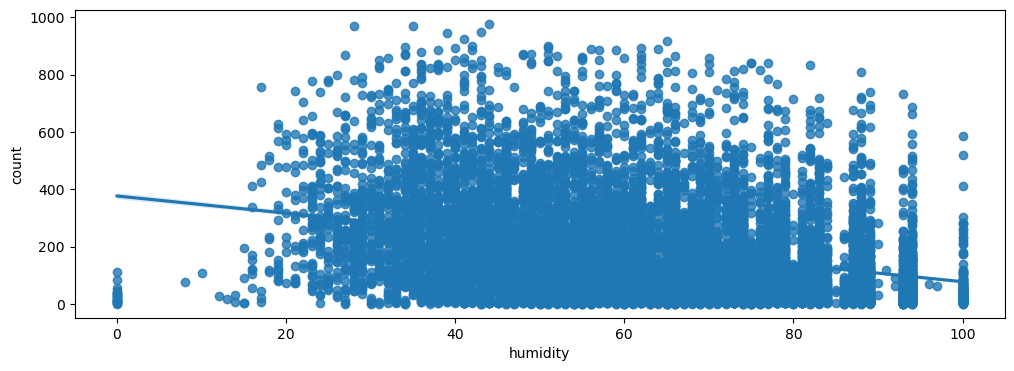

In [66]:
ig = plt.subplots(figsize=(12,4))
sns.regplot(x='humidity',y='count',data=train_df)

<Axes: xlabel='windspeed', ylabel='count'>

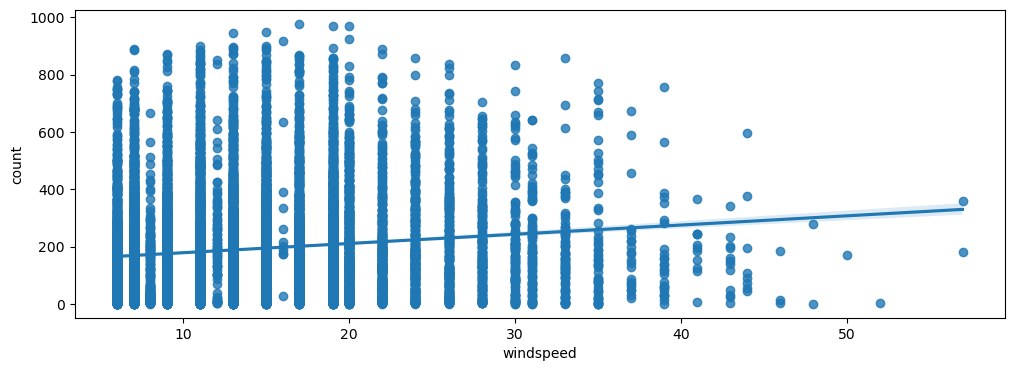

In [67]:
fig = plt.subplots(figsize=(12,4))
sns.regplot(x='windspeed',y='count',data=train_df)

<Axes: >

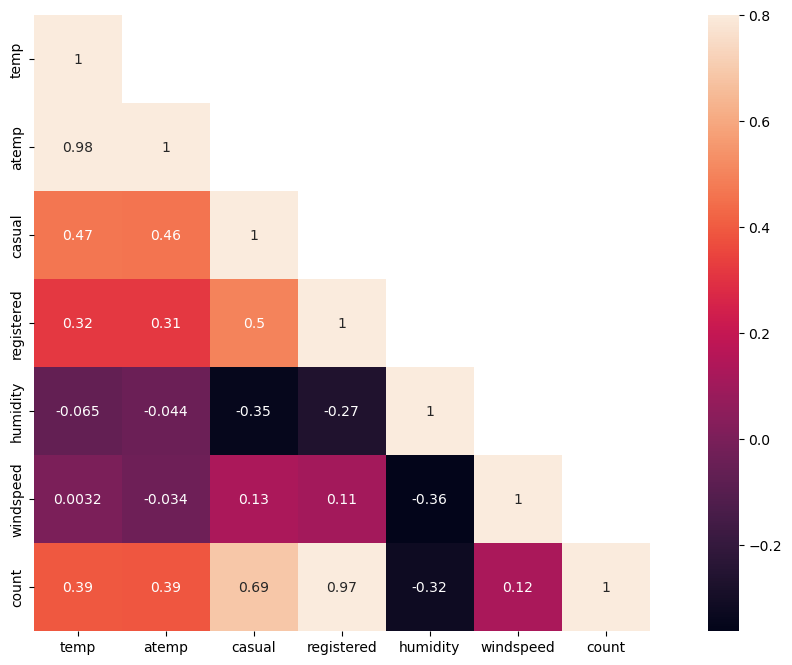

In [71]:
corr = train_df[['temp','atemp','casual','registered','humidity','windspeed','count']].corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax = plt.subplots()
fig.set_size_inches(15,8)
sns.heatmap(corr,mask=mask,vmax=.8,square=True,annot=True)



In [9]:
X = train_df.drop(['count', 'datetime'], axis=1) 
y = train_df['count']  

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

<Axes: ylabel='Density'>

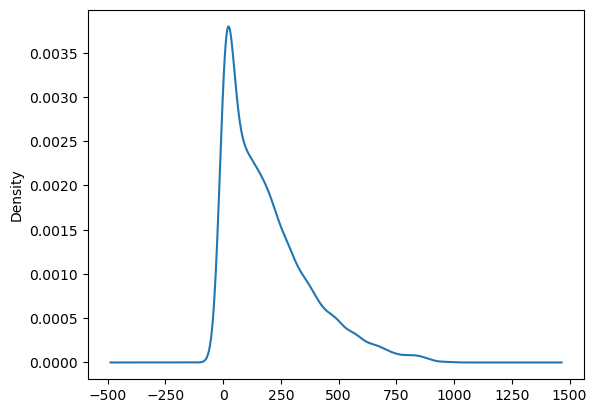

In [72]:
train_df['count'].plot(kind='kde')

<Axes: ylabel='Density'>

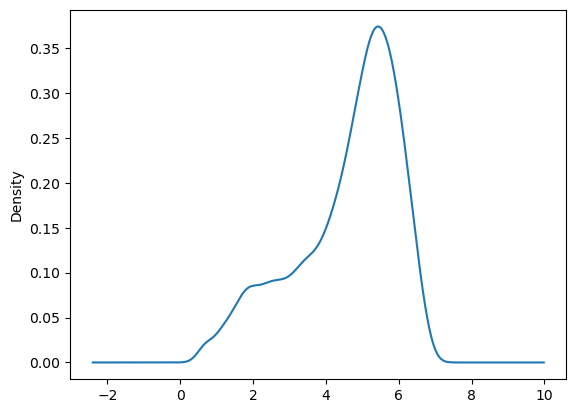

In [75]:
train_df['count_log']=train_df['count'].apply(lambda x: math.log(x+1))
train_df['count_log'].plot(kind='kde')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

dataWind0 = Dataset[Dataset["windspeed"]==0]
dataWindNot0 = Dataset[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
data = dataWindNot0.append(dataWind0)
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)





Mean Squared Error: 2.278470150053374e-26
